In [2]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [5]:
filename = 'Fig2D_S3_data.xlsx'
xl = pd.ExcelFile(filename)
print(xl.sheet_names)

['fig2D']


In [6]:
# import OD600 data
raw_od = xl.parse('fig2D', index_col = None, header = None, skiprows = 49).iloc[:96,:92]

# import GFP data
raw_gfp = xl.parse('fig2D', index_col = None, header = None, skiprows = 150).iloc[:96,:92]

# import time info
time = xl.parse('fig2D', index_col = None, header = None, skiprows = 47).iloc[0,1:92]
time = time/3600

plate layout:

<img src='plate_layout.png'/>

In [7]:
# transform to long form
temp_header = time.copy()
time_header = pd.concat([pd.Series(['wellID']), temp_header])

od = raw_od.copy()
od.columns = time_header

sample_types = np.concatenate([
    np.array(['naive']), np.array(['sp1']*10), np.array(['pTarget']),
    np.array(['naive']), np.array(['sp1']*10), np.array(['pTarget']),
    np.array(['naive']), np.array(['sp1']*10), np.array(['pTarget']),
    np.array(['naive']), np.array(['sp1']*10), np.array(['pTarget']),
    np.array(['pCas9']), np.array(['sp1']*10), np.array(['pCas9+pTarget']),
    np.array(['pCas9']), np.array(['sp1']*10), np.array(['pCas9+pTarget']),
    np.array(['pCas9']), np.array(['sp1']*10), np.array(['pCas9+pTarget']),
    np.array(['pCas9']), np.array(['sp1']*10), np.array(['pCas9+pTarget']),
])

atcs = np.tile(np.concatenate([
    np.array(['LB']),np.tile(np.array(['0.01atc', '0.1atc','1atc','10atc','100atc']),2), np.array(['LB'])
]),8)

ATc = np.tile(np.concatenate([
    np.array([-1]),np.tile(np.array([0.01, 0.1,1,10,100]),2), np.array([-1])
]),8)

kans = np.concatenate([
    np.array(['LB']), np.array(['0 kan']*10), np.array(['LB']),
    np.array(['LB']), np.array(['0 kan']*10), np.array(['LB']),
    np.array(['LB']), np.array(['0 kan']*10), np.array(['LB']),
    np.array(['LB']), np.array(['0 kan']*10), np.array(['LB']),
    np.array(['LB']), np.array(['10 kan']*10), np.array(['LB']),
    np.array(['LB']), np.array(['10 kan']*10), np.array(['LB']),
    np.array(['LB']), np.array(['10 kan']*10), np.array(['LB']),
    np.array(['LB']), np.array(['10 kan']*10), np.array(['LB']),
])

lins = np.concatenate([
    np.array(['LB']), np.array(['0 lin']*10), np.array(['LB']),
    np.array(['LB']), np.array(['0 lin']*10), np.array(['LB']),
    np.array(['LB']), np.array(['3.2 lin']*10), np.array(['LB']),
    np.array(['LB']), np.array(['3.2 lin']*10), np.array(['LB']),
    np.array(['LB']), np.array(['0 lin']*10), np.array(['LB']),
    np.array(['LB']), np.array(['0 lin']*10), np.array(['LB']),
    np.array(['LB']), np.array(['3.2 lin']*10), np.array(['LB']),
    np.array(['LB']), np.array(['3.2 lin']*10), np.array(['LB']),
    
])

replicateID = np.concatenate([
    np.array([1]), np.repeat(np.array([1,2]),5), np.array([1]),
    np.array([2]), np.repeat(np.array([3,4]),5), np.array([2]),
    np.array([3]), np.repeat(np.array([1,2]),5), np.array([3]),
    np.array([4]), np.repeat(np.array([3,4]),5), np.array([4]),
    np.array([1]), np.repeat(np.array([1,2]),5), np.array([1]),
    np.array([2]), np.repeat(np.array([3,4]),5), np.array([2]),
    np.array([3]), np.repeat(np.array([1,2]),5), np.array([3]),
    np.array([4]), np.repeat(np.array([3,4]),5), np.array([4]),

])

od.insert(1, 'sample', sample_types)
od.insert(1, 'atc', atcs)
od.insert(1, 'ATc', ATc)
od.insert(1, 'kan', kans)
od.insert(1, 'lin', lins)
od.insert(1, 'replicate', replicateID)


# onto long form
od_long = pd.melt(od, id_vars = ['wellID','sample','atc','ATc','kan','lin','replicate'], value_name = 'OD600')
od_long.rename(columns = {'variable':'hours'}, inplace = True)
od_long.OD600 = od_long.OD600.astype(float)
od_long.hours = od_long.hours.astype(float)


# transform to long form (GFP)
temp_header = time.copy()
time_header = pd.concat([pd.Series(['wellID']), temp_header])

gfp = raw_gfp.copy()
gfp.columns = time_header

gfp.insert(1, 'sample', sample_types)
gfp.insert(1, 'atc', atcs)
gfp.insert(1, 'ATc', ATc)
gfp.insert(1, 'kan', kans)
gfp.insert(1, 'lin', lins)
gfp.insert(1, 'replicate', replicateID)

gfp_long = pd.melt(gfp, id_vars = ['wellID','sample','atc','ATc','kan','lin','replicate'], value_name = 'GFP')
gfp_long.rename(columns = {'variable':'hours'}, inplace = True)
gfp_long.GFP= gfp_long.GFP.astype(float)
gfp_long.hours = gfp_long.hours.astype(float)


# merge OD and GFP data
final_df =  pd.merge(od_long, gfp_long)

# insert normalized GFP 
norm_gfp = final_df['GFP']/final_df['OD600']
final_df.insert(9, 'Normalized GFP', norm_gfp)
final_df

,wellID,sample,atc,ATc,kan,lin,replicate,hours,OD600,Normalized GFP,GFP
0,A1,naive,LB,-1.00,LB,LB,1,0.000000,0.0533,281.425887,15.0
1,A2,sp1,0.01atc,0.01,0 kan,0 lin,1,0.000000,0.0534,299.625475,16.0
2,A3,sp1,0.1atc,0.10,0 kan,0 lin,1,0.000000,0.0531,301.318261,16.0
3,A4,sp1,1atc,1.00,0 kan,0 lin,1,0.000000,0.0532,319.548878,17.0
4,A5,sp1,10atc,10.00,0 kan,0 lin,1,0.000000,0.0529,321.361050,17.0
...,...,...,...,...,...,...,...,...,...,...,...
8731,H8,sp1,0.1atc,0.10,10 kan,3.2 lin,4,15.000306,0.3703,399.675944,148.0
8732,H9,sp1,1atc,1.00,10 kan,3.2 lin,4,15.000306,0.2877,278.067434,80.0
8733,H10,sp1,10atc,10.00,10 kan,3.2 lin,4,15.000306,0.2803,228.326800,64.0
8734,H11,sp1,100atc,100.00,10 kan,3.2 lin,4,15.000306,0.2477,246.265638,61.0


In [8]:
# parse t = 15 hours data
t15df = final_df[final_df['hours']==time.iloc[90]]
t15df

,wellID,sample,atc,ATc,kan,lin,replicate,hours,OD600,Normalized GFP,GFP
8640,A1,naive,LB,-1.00,LB,LB,1,15.000306,0.4799,47.926651,23.0
8641,A2,sp1,0.01atc,0.01,0 kan,0 lin,1,15.000306,0.4261,337.948850,144.0
8642,A3,sp1,0.1atc,0.10,0 kan,0 lin,1,15.000306,0.3939,210.713375,83.0
8643,A4,sp1,1atc,1.00,0 kan,0 lin,1,15.000306,0.4011,82.273745,33.0
8644,A5,sp1,10atc,10.00,0 kan,0 lin,1,15.000306,0.3800,94.736843,36.0
...,...,...,...,...,...,...,...,...,...,...,...
8731,H8,sp1,0.1atc,0.10,10 kan,3.2 lin,4,15.000306,0.3703,399.675944,148.0
8732,H9,sp1,1atc,1.00,10 kan,3.2 lin,4,15.000306,0.2877,278.067434,80.0
8733,H10,sp1,10atc,10.00,10 kan,3.2 lin,4,15.000306,0.2803,228.326800,64.0
8734,H11,sp1,100atc,100.00,10 kan,3.2 lin,4,15.000306,0.2477,246.265638,61.0


In [9]:
# calculate background gfp intesntity from naive cell wells 
avg_norm_gfp_t15 = np.mean(t15df[t15df['sample']=='naive']['GFP'])
avg_norm_gfp_t15

22.5

# Figure 2D

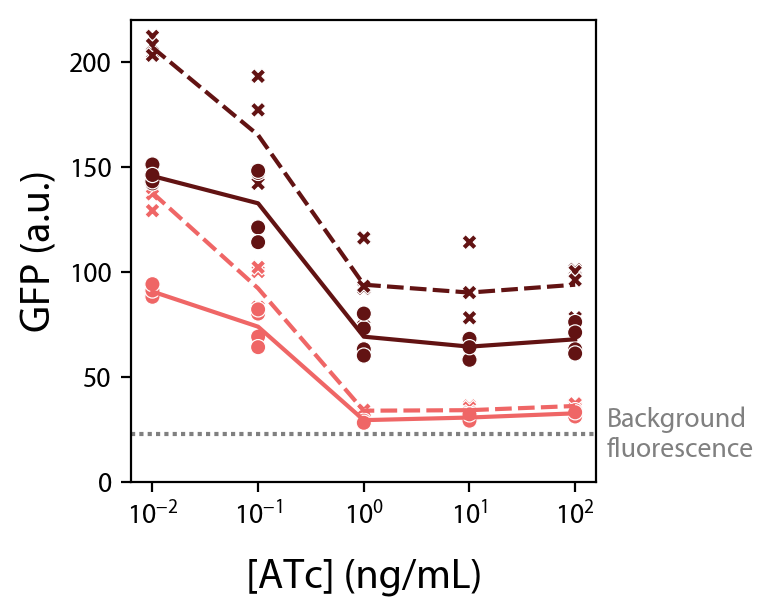

In [10]:
# plot
fig, axes = plt.subplots(1,1, figsize = (3,3), sharey = True, sharex = True, dpi=200)
plt.rcParams['font.sans-serif'] = "Myriad Pro"

sns.lineplot(data = t15df[(t15df['sample']=='sp1')], x = 'ATc', y = 'GFP', hue = 'kan', style = 'lin', 
             # err_style = 'bars',errorbar=("se", 2),
             style_order = ['3.2 lin', '0 lin'],palette=['#EF6666', '#621313'], errorbar=None)
sns.scatterplot(data = t15df[(t15df['sample']=='sp1')], x = 'ATc', y = 'GFP', hue = 'kan', 
                style = 'lin', style_order = ['3.2 lin', '0 lin'],
                 
                s = 30, color=".2",palette=['#EF6666', '#621313'], markers = ['o', 'X'])
axes.set_xscale('log')
axes.set_ylabel('GFP (a.u.)', fontsize = 15)
axes.set_xlabel('[ATc] (ng/mL)', fontsize = 15, labelpad = 10)
axes.set_xticks([0.01,0.1,1,10,100])
# sns.move_legend(axes, "upper left", bbox_to_anchor=(1, 1))
axes.set_ylim([0,220])
axes.get_legend().remove()
axes.axhline(avg_norm_gfp_t15, color = 'gray', dashes = (1,1))
plt.text(200,avg_norm_gfp_t15, 'Background\nfluorescence', va = 'center', fontsize = 10, color = 'gray') 

plt.show()

# Supplementary Figure 3

In [19]:
# extract 
figs3_df = t15df[(t15df['sample']=='pCas9') | (t15df['sample']=='pCas9+pTarget')]
figs3_df

,wellID,sample,atc,ATc,kan,lin,replicate,hours,OD600,Normalized GFP,GFP
8688,E1,pCas9,LB,-1.0,LB,LB,1,15.000306,0.4976,40.192927,20.0
8699,E12,pCas9+pTarget,LB,-1.0,LB,LB,1,15.000306,0.4201,1625.803367,683.0
8700,F1,pCas9,LB,-1.0,LB,LB,2,15.000306,0.4995,46.046045,23.0
8711,F12,pCas9+pTarget,LB,-1.0,LB,LB,2,15.000306,0.4196,1468.064789,616.0
8712,G1,pCas9,LB,-1.0,LB,LB,3,15.000306,0.4944,42.475729,21.0
8723,G12,pCas9+pTarget,LB,-1.0,LB,LB,3,15.000306,0.4436,1530.658254,679.0
8724,H1,pCas9,LB,-1.0,LB,LB,4,15.000306,0.5025,43.781095,22.0
8735,H12,pCas9+pTarget,LB,-1.0,LB,LB,4,15.000306,0.4365,1525.773151,666.0


In [ ]:
fig, axes = plt.subplots(1,1, figsize = (3,3), sharey = True, sharex = True, dpi=200)
# plt.subplots_adjust( wspace=0.5)
plt.rcParams['font.sans-serif'] = "Myriad Pro"

sns.lineplot(data = cas9_df, x = 'hours', y = 'OD600', ax = axes, 
             units = 'wellID', estimator = None, color = '#A9D18E', label = 'Plasmid-free' )
sns.lineplot(data = cas9ntarget_df, x = 'hours', y = 'OD600', ax = axes, 
             units = 'wellID', estimator = None, color = '#385723', label = 'Plasmid-carrying')
axes.get_legend().remove()

axes.text(26, 0.63, 'Plasmid-free', fontsize = 15, color ='#A9D18E')
axes.text(26, 0.53, 'Plasmid-carrying', fontsize = 15, color ='#385723')

axes.set_ylabel('OD600', fontsize = 15)
axes.set_xlabel('Hours', fontsize = 15)

axes.axhline(y = 0.1, xmin = -1, xmax = 0.15, color = 'gray', linestyle = 'dashed', alpha = 0.5)
axes.axhline(y = 0.2, xmin = -1, xmax = 0.3, color = 'gray', linestyle = 'dashed', alpha = 0.5)

plt.show()
